In [2]:
# Part 1 Study and repoduce code from Heiss & Brunner textbook
# Part 1 A

import wooldridge as woo
import statsmodels.formula.api as smf

gpa1 = woo.dataWoo('gpa1')

reg = smf.ols(formula='colGPA ~ ACT + hsGPA', data=gpa1)
results = reg.fit()
b = results.params
print(f'b: \n{b}\n')

reg_delta = smf.ols(formula='hsGPA ~ ACT', data=gpa1)
results_delta = reg_delta.fit()
delta_tilde = results_delta.params
print(f'delta_tilde: \n{delta_tilde}\n')

b1_tilde = b['ACT'] + b['hsGPA'] * delta_tilde['ACT']
print(f'b1_tilde: \n{b1_tilde}\n')

reg_om = smf.ols(formula=' colGPA ~ ACT', data=gpa1)
results_om = reg_om.fit()
b_om = results_om.params
print(f'b_om: \n{b_om}\n')


b: 
Intercept    1.286328
ACT          0.009426
hsGPA        0.453456
dtype: float64

delta_tilde: 
Intercept    2.462537
ACT          0.038897
dtype: float64

b1_tilde: 
0.02706397394317853

b_om: 
Intercept    2.402979
ACT          0.027064
dtype: float64



In [3]:
# Part 1B
import wooldridge as woo
import statsmodels.formula.api as smf
import numpy as np

gpa1 = woo.dataWoo('gpa1')

reg = smf.ols(formula='colGPA ~ ACT + hsGPA', data=gpa1)
results = reg.fit()

SER = np.sqrt(results.mse_resid)

reg_hsGPA = smf.ols(formula='hsGPA ~ ACT', data=gpa1)
results_hsGPA = reg_hsGPA.fit()
R2_hsGPA = results_hsGPA.rsquared
VIF_hsGPA = 1 / (1 - R2_hsGPA)
print(f'VIF_hsGPA: \n{VIF_hsGPA}\n')

n = results.nobs
sdx = np.std(gpa1['hsGPA'], ddof=1) * np.sqrt((n-1) / n)
SE_hsGPA = 1 / np.sqrt(n) * SER / sdx * np.sqrt(VIF_hsGPA)
print(f'SE_hsGPA: \n{SE_hsGPA}\n')


VIF_hsGPA: 1.1358234481972784

SE_hsGPA: 0.09581291608057602



In [4]:
# Part 1C
import wooldridge as woo
import numpy as np
import statsmodels.stats.outliers_influence as smo
import patsy as pt

wage1 = woo.dataWoo('wage1')

y, X = pt.dmatrices('np.log(wage) ~ educ + exper + tenure',
                   data=wage1, return_type='dataframe')

K = X.shape[1]
VIF = np.empty(K)
for i in range(K) :
    VIF[i] = smo.variance_inflation_factor(X.values, i)
print(f'VIF: \n{VIF}\n')

VIF: 
[29.37890286  1.11277075  1.47761777  1.34929556]



In [5]:
# Part 1D
import scipy.stats as stats
import numpy as np

alpha = np.array([0.05, 0.01])
cv_t = stats.t.ppf(1- alpha / 2, 137)
print(f'cv_t: \n{cv_t}\n')

cv_n = stats.norm.ppf(1 - alpha / 2)
print(f'cv_n: \n{cv_n}\n')

cv_t: [1.97743121 2.61219198]

cv_n: [1.95996398 2.5758293 ]



In [6]:
# Part 1E
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

gpa1 = woo.dataWoo('gpa1')

reg = smf.ols(formula='colGPA ~ hsGPA + ACT + skipped', data=gpa1)
results = reg.fit()
print(f'results.summary(): {results.summary()}\n')

b = results.params
se = results.bse

tstat = b / se
print(f'tstat: \n{tstat}\n')

pval = 2 * stats.t.cdf(-abs(tstat), 137)
print(f'pval: \n{pval}\n')

results.summary():                             OLS Regression Results                            
Dep. Variable:                 colGPA   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.217
Method:                 Least Squares   F-statistic:                     13.92
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           5.65e-08
Time:                        16:47:31   Log-Likelihood:                -41.501
No. Observations:                 141   AIC:                             91.00
Df Residuals:                     137   BIC:                             102.8
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3896      0.332 

In [7]:
# Part 1F
import scipy.stats as stats
import numpy as np

alpha = np.array([0.05, 0.01])
cv_t = stats.t.ppf(1- alpha, 522)
print(f'cv_t: \n{cv_t}\n')

cv_n = stats.norm.ppf(1 - alpha)
print(f'cv_n: \n{cv_n}\n')

cv_t: 
[1.64777794 2.33351273]

cv_n: 
[1.64485363 2.32634787]



In [8]:
# Part 1G
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

rdchem = woo.dataWoo('rdchem')

reg = smf.ols(formula='np.log(rd) ~ np.log(sales) + profmarg', data=rdchem)
results = reg.fit()
print(f'results.summary(): \n{results.summary()}\n')

CI95 = results.conf_int(0.05)
print(f'CI95: \n{CI95}\n')

CI99 = results.conf_int(0.01)
print(f'CI99: \n{CI99}\n')

results.summary(): 
                            OLS Regression Results                            
Dep. Variable:             np.log(rd)   R-squared:                       0.918
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     162.2
Date:                Mon, 14 Feb 2022   Prob (F-statistic):           1.79e-16
Time:                        16:56:18   Log-Likelihood:                -22.511
No. Observations:                  32   AIC:                             51.02
Df Residuals:                      29   BIC:                             55.42
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -4.3783  

In [10]:
# Part 1H
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf
import scipy.stats as stats

mlb1 = woo.dataWoo('mlb1')
reg_ur = smf.ols(formula='np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr', data=mlb1)
fit_ur = reg_ur.fit()
r2_ur = fit_ur.rsquared
print(f'r2_ur: {r2_ur}\n')

reg_r = smf.ols(formula='np.log(salary) ~ years + gamesyr', data=mlb1)
fit_r = reg_r.fit()
r2_r = fit_r.rsquared
print(f'r2_r: {r2_r}\n')

fstat = (r2_ur - r2_r) / (1 - r2_ur) * (n - 6) / 3
print(f'fstat: {fstat}\n')

cv = stats.f.ppf(1 - 0.01, 3, 347)
print(f'cv: {cv}\n')

fpval = 1 - stats.f.cdf(fstat, 3, 347)
print(f'fpval: {fpval}\n')

r2_ur: 0.6278028485187441

r2_r: 0.5970716339066895

fstat: 3.7155164998948216

cv: 3.838520048496057

fpval: 0.011796307312933907



In [11]:
# Part 1I
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

mlb1 = woo.dataWoo('mlb1')
reg = smf.ols(formula='np.log(salary) ~ years + gamesyr + bavg + hrunsyr + rbisyr', data=mlb1)
results = reg.fit()

hypotheses = ['bavg = 0', 'hrunsyr = 0', 'rbisyr = 0']
ftest = results.f_test(hypotheses)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')


fstat: 9.550253521952065

fpval: 4.473708139837865e-06



In [13]:
# Part 1J
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats

np.random.seed(1234567)
n = 100
r = 10000

beta0 = 1
beta1 = 0.5
sx = 1
ex = 4

b1 = np.empty(r)
x = stats.norm.rvs(ex, sx, size=n)

for i in range(r):
    u = stats.norm.rvs(0, 1, size=n)
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y':y, 'x': x})
    
    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b1[i] = results.params['x']
    

In [14]:
# Part 1K
import numpy as np
import statsmodels.formula.api as smf
import pandas as pd
import scipy.stats as stats

np.random.seed(1234567)
n = 100
r = 10000

beta0 = 1
beta1 = 0.5
sx = 1
ex = 4

b1 = np.empty(r)


for i in range(r):
    x = stats.norm.rvs(ex, sx, size=n)
    u = stats.norm.rvs(0, 1, size=n)
    y = beta0 + beta1 * x + u
    df = pd.DataFrame({'y':y, 'x': x})
    
    reg = smf.ols(formula='y ~ x', data=df)
    results = reg.fit()
    b1[i] = results.params['x']


In [16]:
# Part 1L
import wooldridge as woo
import statsmodels.formula.api as smf
import scipy.stats as stats

crime1 = woo.dataWoo('crime1')

reg_r = smf.ols(formula='narr86 ~ pcnv + ptime86 + qemp86', data=crime1)
fit_r = reg_r.fit()
r2_r = fit_r.rsquared
print(f'r2_r: {r2_r}\n')

crime1['utilde'] = fit_r.resid
reg_LM = smf.ols(formula='utilde ~ pcnv + ptime86 + qemp86 + avgsen + tottime', data=crime1)
fit_LM = reg_LM.fit()
r2_LM = fit_LM.rsquared
print(f'r2_LM: {r2_LM}\n')

LM = r2_LM * fit_LM.nobs
print(f'LM: {LM}\n')

cv = stats.chi2.ppf(1 - 0.10, 2)
print(f'cv: {cv}\n')

pval = 1 - stats.chi2.cdf(LM, 2)
print(f'pval: {pval}\n')

reg = smf.ols(formula='narr86 ~ pcnv + ptime86 + qemp86 + avgsen + tottime', data=crime1)
results = reg.fit()
hypotheses = ['avgsen = 0', 'tottime = 0']
ftest = results.f_test(hypotheses)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue
print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

r2_r: 0.04132330770123083

r2_LM: 0.0014938456737877415

LM: 4.070729461071595

cv: 4.605170185988092

pval: 0.13063282803267184

fstat: 2.033921558435125

fpval: 0.13102048172760739



In [18]:
# Part 1M
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

def scale(x):
    x_mean = np.mean(x)
    x_var = np.var(x, ddof=1)
    x_scaled = (x - x_mean) / np.sqrt(x_var)
    return x_scaled

hprice2 = woo.dataWoo('hprice2')
hprice2['price_sc'] = scale(hprice2['price'])
hprice2['nox_sc'] = scale(hprice2['nox'])
hprice2['crime_sc'] = scale(hprice2['crime'])
hprice2['rooms_sc'] = scale(hprice2['rooms'])
hprice2['dist_sc'] = scale(hprice2['dist'])
hprice2['stratio_sc'] = scale(hprice2['stratio'])

reg = smf.ols(formula='price_sc ~ 0 + nox_sc + crime_sc + rooms_sc + dist_sc + stratio_sc', data=hprice2)
results = reg.fit()

table = pd.DataFrame({'b': round(results.params, 4), 
                     'se': round(results.bse, 4),
                     't': round(results.tvalues, 4),
                     'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

table: 
                 b      se        t  pval
nox_sc     -0.3404  0.0445  -7.6511   0.0
crime_sc   -0.1433  0.0307  -4.6693   0.0
rooms_sc    0.5139  0.0300  17.1295   0.0
dist_sc    -0.2348  0.0430  -5.4641   0.0
stratio_sc -0.2703  0.0299  -9.0274   0.0



In [19]:
# Part 1N
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

hprice2 = woo.dataWoo('hprice2')

reg = smf.ols(formula='np.log(price) ~ np.log(nox) + rooms', data=hprice2)
results = reg.fit()

table = pd.DataFrame({'b': round(results.params, 4),
                     'se': round(results.bse, 4),
                     't': round(results.tvalues, 4),
                     'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')


table: 
                  b      se        t  pval
Intercept    9.2337  0.1877  49.1835   0.0
np.log(nox) -0.7177  0.0663 -10.8182   0.0
rooms        0.3059  0.0190  16.0863   0.0



In [20]:
# Part 1O
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

hprice2 = woo.dataWoo('hprice2')

reg = smf.ols(formula='np.log(price) ~ np.log(nox) + np.log(dist) + rooms + I(rooms**2) + stratio', data=hprice2)
results = reg.fit()

table = pd.DataFrame ({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')


table: 
                     b      se        t    pval
Intercept      13.3855  0.5665  23.6295  0.0000
np.log(nox)    -0.9017  0.1147  -7.8621  0.0000
np.log(dist)   -0.0868  0.0433  -2.0051  0.0455
rooms          -0.5451  0.1655  -3.2946  0.0011
I(rooms ** 2)   0.0623  0.0128   4.8623  0.0000
stratio        -0.0476  0.0059  -8.1293  0.0000



In [21]:
# Part 1P
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd
import numpy as np

attend = woo.dataWoo('attend')
n = attend.shape[0]

reg = smf.ols(formula='stndfnl ~ atndrte*priGPA + ACT + I(priGPA**2) + I(ACT**2)', data = attend)
results = reg.fit()

table = pd.DataFrame ({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

b = results.params
partial_effect = b['atndrte'] + 2.59 * b['atndrte:priGPA']
print(f'partial_effect: \n{partial_effect}\n')

hypotheses = 'atndrte + 2.59 * atndrte:priGPA = 0'
ftest = results.f_test(hypotheses)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue
print(f'fstat: \n{fstat}\n')
print(f'fpval: \n{fpval}\n')

table: 
                     b      se       t    pval
Intercept       2.0503  1.3603  1.5072  0.1322
atndrte        -0.0067  0.0102 -0.6561  0.5120
priGPA         -1.6285  0.4810 -3.3857  0.0008
atndrte:priGPA  0.0056  0.0043  1.2938  0.1962
ACT            -0.1280  0.0985 -1.3000  0.1940
I(priGPA ** 2)  0.2959  0.1010  2.9283  0.0035
I(ACT ** 2)     0.0045  0.0022  2.0829  0.0376

partial_effect: 
0.007754572228608877

fstat: 
8.632581056740598

fpval: 
0.003414992399585839



In [22]:
# Part 1Q 
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd

gpa2 = woo.dataWoo('gpa2')

reg =  smf.ols(formula='colgpa ~ sat + hsperc + hsize + I(hsize**2)', data=gpa2)
results = reg.fit()

table = pd.DataFrame ({'b': round(results.params, 4),
                      'se': round(results.bse, 4),
                      't': round(results.tvalues, 4),
                      'pval': round(results.pvalues, 4)})
print(f'table: \n{table}\n')

cvalues1 = pd.DataFrame({'sat': [1200], 'hsperc': [30], 'hsize': [5]}, index=['newPerson1'])
print(f'cvalues1: \n{cvalues1}\n')

colgpa_pred1 = results.predict(cvalues1)
print(f'colgpa_pred1: \n{colgpa_pred1}\n')

cvalues2 = pd.DataFrame ({'sat': [1200, 900, 1400, ],
                         'hsperc': [30, 20, 5], 'hsize': [5, 3, 1]},
                        index=['newPerson1', 'newPerson2', 'newPerson3'])
print(f'cvalues2: \n{cvalues2}\n')

colgpa_pred2 = results.predict(cvalues2)
print(f'colgpa_pred2: \n{colgpa_pred2}\n')

table: 
                    b      se        t    pval
Intercept      1.4927  0.0753  19.8118  0.0000
sat            0.0015  0.0001  22.8864  0.0000
hsperc        -0.0139  0.0006 -24.6981  0.0000
hsize         -0.0609  0.0165  -3.6895  0.0002
I(hsize ** 2)  0.0055  0.0023   2.4056  0.0162

cvalues1: 
             sat  hsperc  hsize
newPerson1  1200      30      5

colgpa_pred1: 
newPerson1    2.700075
dtype: float64

cvalues2: 
             sat  hsperc  hsize
newPerson1  1200      30      5
newPerson2   900      20      3
newPerson3  1400       5      1

colgpa_pred2: 
newPerson1    2.700075
newPerson2    2.425282
newPerson3    3.457448
dtype: float64



In [23]:
# Part 1R
import wooldridge as woo
import statsmodels.formula.api as smf
import pandas as pd

gpa2 = woo.dataWoo('gpa2')

reg =  smf.ols(formula='colgpa ~ sat + hsperc + hsize + I(hsize**2)', data=gpa2)
results = reg.fit()

cvalues2 = pd.DataFrame ({'sat': [1200, 900, 1400, ],
                         'hsperc': [30, 20, 5], 'hsize': [5, 3, 1]},
                        index=['newPerson1', 'newPerson2', 'newPerson3'])

colgpa_PICI_95 = results.get_prediction(cvalues2) .summary_frame(alpha=0.05)
print(f'colgpa_PICI_95: \n{colgpa_PICI_95}\n')

colgpa_PICI_99 = results.get_prediction(cvalues2) .summary_frame(alpha=0.01)
print(f'colgpa_PICI_99: \n{colgpa_PICI_99}\n')

colgpa_PICI_95: 
       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2.700075  0.019878       2.661104       2.739047      1.601749   
1  2.425282  0.014258       2.397329       2.453235      1.327292   
2  3.457448  0.027891       3.402766       3.512130      2.358452   

   obs_ci_upper  
0      3.798402  
1      3.523273  
2      4.556444  

colgpa_PICI_99: 
       mean   mean_se  mean_ci_lower  mean_ci_upper  obs_ci_lower  \
0  2.700075  0.019878       2.648850       2.751301      1.256386   
1  2.425282  0.014258       2.388540       2.462025      0.982034   
2  3.457448  0.027891       3.385572       3.529325      2.012879   

   obs_ci_upper  
0      4.143765  
1      3.868530  
2      4.902018  



In [24]:
# Part 2
# Chapter 4
# Problem 2
# i. Null hypothesis: In the given dataset, % return on stock does not have
# a statistically significant effect on CEO salary
# Alternative: In the given dataset, % return on stock does have
# a statistically significant positive correlation to CEO salary
# ii. In the given model, an increase in ros by 50 points increases CEO salary
# by 1.2%. This is not a very large effect.
# iii.
import wooldridge as woo
import numpy as np
import statsmodels.formula.api as smf

CEOSAL1 = woo.dataWoo('CEOSAL1')
reg = smf.ols(formula='lsalary ~ lsales + roe + ros', data=CEOSAL1)
results = reg.fit()

hypothesis = ['ros = 0']
ftest = results.f_test(hypothesis)
fstat = ftest.statistic[0][0]
fpval = ftest.pvalue

print(f'fstat: {fstat}\n')
print(f'fpval: {fpval}\n')

# We cannot reject the null hypothesis with this p value
# iv. I would not include ros in my final model because the p value is so high,
# and the residual is very small- even if it matters, it's not by much


fstat: 0.19893498077515223

fpval: 0.656052598150402



In [26]:
# Problem 5
# i
import wooldridge as woo
import statsmodels.formula.api as smf

GPA1 = woo.dataWoo('GPA1')

reg = smf.ols(formula='colGPA ~ hsGPA + ACT + skipped', data=GPA1)
results = reg.fit()

CI95 = results.conf_int(0.05)
print(f'CI95: \n{CI95}\n')

# ii. 0.4 is within the range of hsGPA so we cannot reject it at 5%
# iii. 1 is not within the range so we can reject it at 5%


CI95: 
                  0         1
Intercept  0.733930  2.045178
hsGPA      0.226582  0.597050
ACT       -0.006171  0.035612
skipped   -0.134523 -0.031703



In [40]:
# Problem 10
# i.
import wooldridge as woo
import statsmodels.formula.api as smf

RETURN = woo.dataWoo('RETURN')

reg = smf.ols(formula='(sp94 - sp90) ~ dkr + eps + netinc + salary', data=RETURN)
results = reg.fit()

hypotheses = ['dkr = 0', 'eps = 0', 'netinc = 0', 'salary = 0']
ftest = results.f_test(hypotheses)
group_pval = ftest.pvalue

print(f'group_pval: {group_pval}\n')

b = results.params
se = results.bse

tstat = b / se

ind_pval = 2 * stats.t.cdf(-abs(tstat), 142)
print(f'ind_pval: \n{ind_pval}\n')

# They are not jointly significant
# netinc is individually

# ii. 
import numpy as np
iireg = smf.ols(formula='(sp94 - sp90) ~ dkr + eps + np.log(netinc) + np.log(salary)', data=RETURN)
iiresults = reg.fit()

iihypotheses = ['dkr = 0', 'eps = 0', 'netinc = 0', 'salary = 0']
iiftest = results.f_test(hypotheses)
iigroup_pval = iiftest.pvalue

print(f'iigroup_pval: {iigroup_pval}\n')

iib = results.params
iise = results.bse

iitstat = iib / iise

iiind_pval = 2 * stats.t.cdf(-abs(iitstat), 142)
print(f'iiind_pval: \n{iiind_pval}\n')

# No change

# iii. Using logs of 0s or negatives would not help improve the model as they are undefined
# iv. The evidence for predictability of stock returns is weak.

group_pval: 0.19462961425362038

ind_pval: 
[1.03136956e-19 2.48127522e-01 6.31376036e-01 3.43858664e-02
 6.82493236e-01]

iigroup_pval: 0.19462961425362038

iiind_pval: 
[1.03136956e-19 2.48127522e-01 6.31376036e-01 3.43858664e-02
 6.82493236e-01]



In [42]:
# Problem C6
import wooldridge as woo
import statsmodels.formula.api as smf

WAGE2 = woo.dataWoo('WAGE2')

reg = smf.ols(formula='lwage ~ educ + exper + tenure', data=WAGE2)
results = reg.fit()

hypothesis = ['exper = tenure']
ftest = results.f_test(hypothesis)
pval = ftest.pvalue

print(f'pval: {pval}\n')

# i. pval: 0.6805292607474092

# ii. 
CI95 = results.conf_int(0.05)
print(f'CI95: \n{CI95}\n')
# The 95% confidence intervals for experience and tenure are very similiar
# There is likely little to no difference between the two on wage

pval: 0.6805292607474092

CI95: 
                  0         1
Intercept  5.279782  5.713609
educ       0.062083  0.087645
exper      0.008716  0.021941
tenure     0.008297  0.018452



In [45]:
# Problem C10
import wooldridge as woo
import statsmodels.formula.api as smf

skool = woo.dataWoo('ELEM94_95')

reg = smf.ols(formula='lavgsal ~ bs', data=skool)
results = reg.fit()

CI95 = results.conf_int(0.05)
print(f'CI95: \n{CI95}\n')

# i. The slope is statistically significant from 0, but -1 falls within the 95% CI

reg2 = smf.ols(formula='lavgsal ~ bs + lenrol + lstaff', data=skool)
results2 = reg2.fit()

CI95_2 = results2.conf_int(0.05)
print(f'CI95_2: \n{CI95_2}\n')

# ii. The coefficient on bs moved closer to 0
# iii. Standard error will always shrink when more statistically significant variables
# are added as long as they meet the basic assunmptions
# iv. The meaning of "lstaff" is not given, so I will not speculate as to why it is negative

reg3 = smf.ols(formula='lavgsal ~ bs + lenrol + lstaff + lunch', data=skool)
results3 = reg3.fit()

CI95_3 = results3.conf_int(0.05)
print(f'CI95_3: \n{CI95_3}\n')

# v. The variable "lunch" does not tell me anything about kids with disadvantaged backgrounds
# without further context that is not provided.

CI95: 
                   0          1
Intercept  10.646574  10.849219
bs         -1.088635  -0.501615

CI95_2: 
                   0          1
Intercept  13.742737  14.163362
bs         -0.818333  -0.391789
lenrol     -0.048211  -0.014960
lstaff     -0.748610  -0.678828

CI95_3: 
                   0          1
Intercept  13.616294  14.046694
bs         -0.731425  -0.300833
lenrol     -0.044994  -0.011825
lstaff     -0.726642  -0.654623
lunch      -0.001075  -0.000441



In [56]:
# Problem C12
bigskool = woo.dataWoo('ECONMATH')

reg = smf.ols(formula='colgpa ~ hsgpa + actmth + acteng', data=bigskool)
results = reg.fit()
print(f'results.summary(): {results.summary()}\n')

# i. These variables are statistically significant.
# ii. Increase hsgpa by .343 and colgpa increases by .226

Data_summary = bigskool.describe()
print(f'Data_summary:\n{Data_summary}\n')

# standard deviation of actmth = 3.773354
# It would take 4.6 standard deviations of actmth to have the same effect

hypothesis = ['actmth = acteng']
ftest = results.f_test(hypothesis)
pval = ftest.pvalue

print(f'pval: {pval}\n')
# iii. The p value is very high, so the null hypothesis is likely true
# iv. I would tell this person that the variables he gave me only explain ~25% 
# and that I'm going to need some more data if he wants 50%

results.summary():                             OLS Regression Results                            
Dep. Variable:                 colgpa   R-squared:                       0.256
Model:                            OLS   Adj. R-squared:                  0.253
Method:                 Least Squares   F-statistic:                     92.76
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           1.31e-51
Time:                        09:55:59   Log-Likelihood:                -531.52
No. Observations:                 814   AIC:                             1071.
Df Residuals:                     810   BIC:                             1090.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0282      0.168 

In [57]:
# Chapter 5 
# Question 3
# A quick google search showed that ~14% of US adults smoke cigs. 
# With a majority not smoking any, the # of cigs smoked per day is not normall distributed
# if you include non-smokers in the sample.

In [58]:
# Question 5
# i. While a score above 100 does not appear to be possible, a >0 probability
# will be estimated since the tail of the normal curve includes higher values
# ii. The left tail excludes some values. This implies that they are extreme outliers,
# however it appears that this curve is not a good fit because there more observations
# on that side that would be expected.

In [84]:
# Question 6
# i. B0 + B1X + B2X^2 + U = A0 + B1X + V
# E(U|X) = 0
# E(X) = 0
# B0 + B2X^2 + U = A0 + V
# E(B0 + B2X^2 + U) = E (A0 + V)
# E(B0 + B2) = E (A0 + V)
# B0 + B2 = A0 + V

# ii. 
# B0 + B1X + B2X^2 + U = A0 + B1X + V
# B0 + B2X^2 + U = A0 + V = (B0 + B2) + V
# B2X^2 + U = B^2 + V
# B2(X^2 -1) + U = V
# V is dependent on X

# iii. 
# cov(x,v) = 0
# E[(x-E(x))(v-E(x))] = E[(x-0)(v-E(B2(x^2-1)+u))] =
# E[(x)(v-E(B2 x^2)+E(B2)-E(u))]
# cov(x,v) = E[(x)-(v-B2 E(x^2) +B2-0)] = E[(x)(v-B2 * 1 + B2)] = E[(x)(v)]
# E(u|x)=0 , E(x)=0, E(x^3)=0

# iv.
# If a regression contains relevant regressors and normally distributed error,
# B_hat 1 is an unbiased estimator of B1

# v.
# Estimating B1 allows us to show how much a change in x impacts y in the model,
# with all else constant. If x = 0, x does not influence y

# vi.
# Being able to estimate B1 and B2 is more valuable than just B1 because increasing 
# the number of relevant regressors improves model accuracy.


In [ ]:
# Question C3
fatbaby = woo.dataWoo('BWGHT')

reg = smf.ols(formula='bwghtlbs ~ motheduc + fatheduc', data=fatbaby)
results = reg.fit()
print(f'results.summary(): {results.summary()}\n')

hypotheses = ['motheduc = 0', 'fatheduc = 0']
ftest = results.f_test(hypotheses)
group_pval = ftest.pvalue
print(f'group_pval: {group_pval}\n')

# They are joinly significant at 95% but not 99%. 
# The R^2 is very low so they are still not explaining much

In [63]:
# Chapter 6
# Question 3
# i. Marginal effect of sales on rdinens comes at ~ $429,000,000,000
# ii. This model makes sense because if sales are high enough, the % of R&D cost
# relative to sales will shrink
# iii. rdintens = 2.613 + 3*10^-7 * salesbil - 7*10^-12 salesbil^2
# iv. Sales in millions require less zeros and is easier to read

In [64]:
# Question 4
# i. log(wage) = B0 + B1(educ) + B2(educ)(pareduc) + B3(exper) + B4(tenure) + u
# delta(log(wage))/delta(educ) = B1 + B2(pareduc) because 
# the derivative of the first given equation in relation to educ is B1 + B2(pareduc) 
# B2 will likely be positive because higher educated parents probably lead to more
# opportunities for personal educational advancement

# ii.  For every additonal year of pareduc * educ, expected wage increases by 0.078%

# iii. The individual value of pareduc is still high enough that there is a positive
# relationship between pareduc and log(wage)

In [65]:
# Question 7
# I prefer the second model because it had the highest R^2 and 
# adjusted R^2, so it explains the highest % of variation in prate

In [66]:
# Question 10
# i. As a policymaker making an argument about expenditures, the first model is better
# because the coeffiecient on lexppp is much higher. It is not actually better since
# the R^2 is much lower. 
# The estimated increase in math score with a 10% increase in lexppp is 0.9 vs 0.19

# ii. Adding read4 changes all of the coefficients significantly

# iii. If I am trying to show a relationship between spending and math scores,
# I would want to only include data that supports that conclusion.

In [71]:
# Question C2
# i.
ched = woo.dataWoo('WAGE1')
reg = smf.ols(formula='lwage ~ educ + exper + expersq', data=ched)
results = reg.fit()
print(f'results.summary(): {results.summary()}\n')
# ii. expersq is statistically significant
# iii. 5th year of experience =  3.54% increase in wage
# 12th year of experience = 1.44% increase in wage
# iv. 29.29 years of experience is when predicted log(wage) starts to decrease

results.summary():                             OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.296
Method:                 Least Squares   F-statistic:                     74.67
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           3.38e-40
Time:                        11:43:28   Log-Likelihood:                -319.53
No. Observations:                 526   AIC:                             647.1
Df Residuals:                     522   BIC:                             664.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1280      0.106 

In [104]:
# Question C3
# i. log(wage) = B0 + B1 educ + B2 exper + B3 edux * exper + u
# d(Log(wage))/d(educ) = B1 + B3 exper

# ii. Null hypothesis: B3 = 0

moolah = woo.dataWoo('WAGE2')

reg = smf.ols(formula='lwage ~ educ + exper + (educ * exper)', data=moolah)
results = reg.fit()

CI95 = results.conf_int(0.05)
print(f'CI95: \n{CI95}\n')

# iii. 0 is not within the 95% confidence interval, so the return on education
# at least very slightly depends on experience

print(f'results.summary(): {results.summary()}\n')

# iv. theta1 = B1 + B3 (exper)
# B1 = theta1 - 10B3 for exper = 10
# log(wage) = B0 + (theta1 - 10B3)educ + B2 exper + B3 educ*exper + u
# log(wage) = B0 + theta1 + B2 exper + B3 educ (exper-10) + u

CI95: 
                   0         1
Intercept   5.476829  6.422080
educ        0.009919  0.078180
exper      -0.060704  0.017712
educ:exper  0.000202  0.006204

results.summary():                             OLS Regression Results                            
Dep. Variable:                  lwage   R-squared:                       0.135
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                     48.41
Date:                Thu, 17 Feb 2022   Prob (F-statistic):           4.47e-29
Time:                        21:36:07   Log-Likelihood:                -449.87
No. Observations:                 935   AIC:                             907.7
Df Residuals:                     931   BIC:                             927.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std

In [79]:
# Question C5
hizzouse = woo.dataWoo('HPRICE1')

reg = smf.ols(formula='lprice ~ llotsize + lsqrft + bdrms', data=hizzouse)
results = reg.fit()
print(f'results.summary(): {results.summary()}\n')

# ii. lotsize = 20,000 sqrft = 2500 bdrms = 4 log(price) = 5.993182926
# iii. 
reg2 = smf.ols(formula='price ~ lotsize + sqrft + bdrms', data=hizzouse)
results2 = reg2.fit()
print(f'results2.summary(): {results2.summary()}\n')

# The second model has a higher R^2

results.summary():                             OLS Regression Results                            
Dep. Variable:                 lprice   R-squared:                       0.643
Model:                            OLS   Adj. R-squared:                  0.630
Method:                 Least Squares   F-statistic:                     50.42
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           9.74e-19
Time:                        14:54:00   Log-Likelihood:                 25.861
No. Observations:                  88   AIC:                            -43.72
Df Residuals:                      84   BIC:                            -33.81
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.2970      0.651 

In [81]:
# Question C8
cribz = woo.dataWoo('HPRICE1')

reg = smf.ols(formula='price ~ lotsize + sqrft + bdrms', data=cribz)
results = reg.fit()
print(f'results.summary(): {results.summary()}\n')

# i. lotsize = 10,000 sqrft = 2,300 bdrms = 4 price = $337,000
# ii. 
CI95 = results.conf_int(0.05)
print(f'CI95: \n{CI95}\n')
# iii. 95% confidence interval for the given house is:
# $133,000 to $540,000. This is a huge range. Maybe location matters

results.summary():                             OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.672
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     57.46
Date:                Tue, 15 Feb 2022   Prob (F-statistic):           2.70e-20
Time:                        14:57:53   Log-Likelihood:                -482.88
No. Observations:                  88   AIC:                             973.8
Df Residuals:                      84   BIC:                             983.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -21.7703     29.475 

base_results.summary(): 
                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.636
Model:                            OLS   Adj. R-squared:                  0.632
Method:                 Least Squares   F-statistic:                     174.5
Date:                Thu, 17 Feb 2022   Prob (F-statistic):          3.61e-107
Time:                        16:35:34   Log-Likelihood:                -5080.8
No. Observations:                 506   AIC:                         1.017e+04
Df Residuals:                     500   BIC:                         1.020e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.087e+04   505

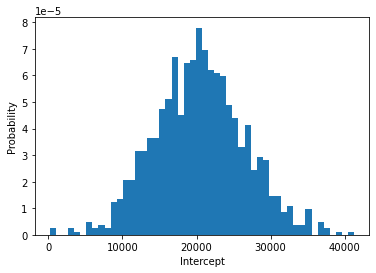

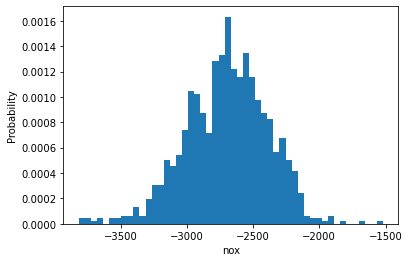

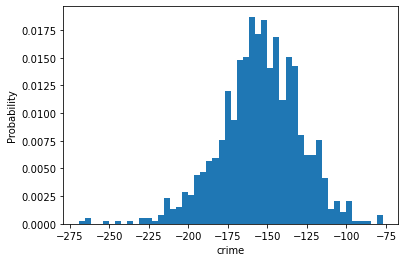

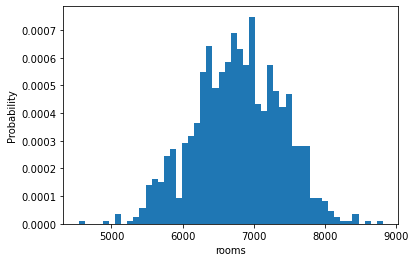

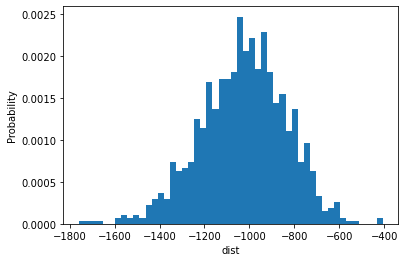

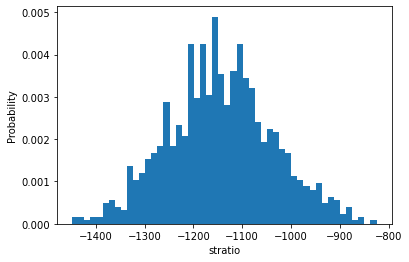

In [103]:
# Part 3
# 1. Calculate the means and standard errors for the regression coefficients using the bootstrap 
# approach with 1000 random draws of the error terms (from OLS estimation) with 
# replacement.  

import matplotlib.pyplot as plt
hprice2= woo.dataWoo('hprice2')

base_reg = smf.ols(formula='price ~ nox + crime + rooms + dist + stratio', data=hprice2)
base_results = base_reg.fit()
print(f'base_results.summary(): \n{base_results.summary()}\n')

num_samples = 1000
betas = []
for i in range(num_samples):
    bootstrap_sample = hprice2.sample(n=506, replace=True, axis=0)
    reg = smf.ols(formula='price ~ nox + crime + rooms + dist + stratio', data=bootstrap_sample)
    betas.append(reg.fit().params)
bootstrap_results= reg.fit()
print(f'bootstrap_results.summary(): \n{bootstrap_results.summary()}\n')

# 2. Compare the bootstrap estimates with those from OLS alone. Do OLS estimates provide a 
# good approximation to those from the bootstrap? 
# Yes, while the values are not identical, they are fairly close. The OLS is a good approximation

# 3. Plot the distribution of the bootstrapped coefficient estimates
results_array = np.array(betas)
plt.hist(results_array[:,0], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('Intercept')
plt.show()
plt.hist(results_array[:,1], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('nox')
plt.show()
plt.hist(results_array[:,2], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('crime')
plt.show()
plt.hist(results_array[:,3], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('rooms')
plt.show()
plt.hist(results_array[:,4], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('dist')
plt.show()
plt.hist(results_array[:,5], density=True, bins=50)
plt.ylabel('Probability')
plt.xlabel('stratio')
plt.show()